<a href="https://colab.research.google.com/github/sudeshmu/binary_text_classifier/blob/master/Pipeline_nd_ColumnTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is for the trying and learning Columntransformer and Pipeline classes in the sklearn

In [1]:
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.compose import ColumnTransformer

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
from sklearn.preprocessing import LabelEncoder

# Example 1: Iris dataset classification

In [6]:
dataset = pd.read_csv ("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")

In [7]:
dataset.head ()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
dataset.isnull ().sum ()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
dataset.values[:5]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa']], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ct = ColumnTransformer (transformers=[('label_encoding', OneHotEncoder (), [4])]) #, remainder="passthrough"
y = ct.fit_transform (dataset.values)

In [12]:
x = dataset.values [:, 0:4]

Train test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (x,y)

Pipeline example

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

In [15]:
pipe = Pipeline (steps=[('scalar', StandardScaler ()), ('svm', MultiOutputClassifier (SVC (decision_function_shape="ovr")))])

In [16]:
pipe.fit (X_train, Y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 MultiOutputClassifier(estimator=SVC(C=1.0, break_ties=False,
                                                     cache_size=200,
                                                     class_weight=None,
                                                     coef0=0.0,
                                                     decision_function_shape='ovr',
                                                     degree=3, gamma='scale',
                                                     kernel='rbf', max_iter=-1,
                                                     probability=False,
                                                     random_state=None,
                                                     shrinking=True, tol=0.001,
                                                     verbose=False),
                                 

In [17]:
pipe.score (X_test, Y_test)

0.9473684210526315

#*Example* 2: Wine Quality dataset from UCI

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [18]:
dataset = pd.read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

In [19]:
dataset.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
dataset.isnull ().sum ()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
pipeline = Pipeline (steps=[('scalar', MinMaxScaler ()), ('svc', SVC ())])

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split (dataset.values [:,0:-1], dataset.values [:,-1])

In [24]:
pipeline.fit (X_train, Y_train)

Pipeline(memory=None,
         steps=[('scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [25]:
pipeline.score (X_test, Y_test)

0.5875

# Example 3 Adult Dataset
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [26]:
dataset = pd.read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names =['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'])

In [27]:
dataset.head ()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
dataset.isnull ().sum ()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [29]:
len (dataset)

32561

In [30]:
from matplotlib import pyplot as plt

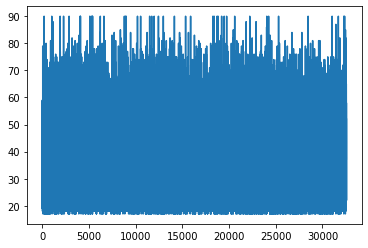

In [31]:
plt.plot (dataset['age'])

In [32]:
dataset ['workclass'].unique ()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

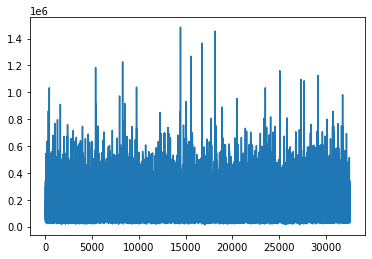

In [33]:
plt.plot (dataset ['fnlwgt'])

In [34]:
#Printing education and it's values associated 

print (" Education Name  Edu Score")
print (" --------------  ---------")

for education_nm in dataset['education'].unique ():
  print ("{:10} \t {} ".format (education_nm, dataset[dataset ['education'] == education_nm]['education-num'].values[0]))

 Education Name  Edu Score
 --------------  ---------
 Bachelors 	 13 
 HS-grad   	 9 
 11th      	 7 
 Masters   	 14 
 9th       	 5 
 Some-college 	 10 
 Assoc-acdm 	 12 
 Assoc-voc 	 11 
 7th-8th   	 4 
 Doctorate 	 16 
 Prof-school 	 15 
 5th-6th   	 3 
 10th      	 6 
 1st-4th   	 2 
 Preschool 	 1 
 12th      	 8 


In [35]:
dataset ['marital-status'].unique ()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [36]:
dataset ['occupation'].unique ()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [37]:
dataset ['relationship'].unique ()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [38]:
dataset ['race'].unique ()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [39]:
dataset ['sex'].unique ()

array([' Male', ' Female'], dtype=object)

In [40]:
dataset ['capital-gain'].unique ()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [41]:
dataset ['native-country'].unique ()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [42]:
dataset.describe ()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
dataset.head (5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
dataset.drop(["education"], axis=1, inplace=True)

In [46]:
for colmn in ['workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'hours-per-week']:
  dataset[colmn] = dataset[colmn].astype('category')

In [47]:
data = dataset.values

In [48]:
data[0]

array([39, ' State-gov', 77516, 13, ' Never-married', ' Adm-clerical',
       ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States',
       ' <=50K'], dtype=object)

In [49]:
dataset.dtypes

age                  int64
workclass         category
fnlwgt               int64
education-num     category
marital-status    category
occupation        category
relationship      category
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week    category
native-country      object
class               object
dtype: object

In [50]:
dataset.columns.values[[1,4,5,6,7,12]]

array(['workclass', 'marital-status', 'occupation', 'relationship',
       'race', 'native-country'], dtype=object)

In [51]:
ct = ColumnTransformer (transformers=[('encoding', OneHotEncoder (),[1,4,5,7])], remainder="passthrough")
data = ct.fit_transform (data)

In [52]:
ind = 0
for value in data [0]:
  print (ind, " ", value)
  ind = ind + 1

0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
5   0.0
6   0.0
7   1.0
8   0.0
9   0.0
10   0.0
11   0.0
12   0.0
13   1.0
14   0.0
15   0.0
16   0.0
17   1.0
18   0.0
19   0.0
20   0.0
21   0.0
22   0.0
23   0.0
24   0.0
25   0.0
26   0.0
27   0.0
28   0.0
29   0.0
30   0.0
31   0.0
32   0.0
33   0.0
34   0.0
35   1.0
36   39
37   77516
38   13
39    Not-in-family
40    Male
41   2174
42   0
43   40
44    United-States
45    <=50K


In [53]:
lb = LabelEncoder ()
data[:,40] = lb.fit_transform (data[:,40])

lb = LabelEncoder ()
data[:,45] = lb.fit_transform (data[:,45])

In [54]:
lb = LabelEncoder ()
data[:,39] = lb.fit_transform (data[:,39])

lb = LabelEncoder ()
data[:,44] = lb.fit_transform (data[:,44])

In [55]:
X = data [:, :-1]
Y = data[:, -1]
scalar = StandardScaler ()
#data = scalar.fit_transform (data)
X = scalar.fit_transform (X)

In [56]:
from sklearn.preprocessing import MinMaxScaler

mm_scalar = MinMaxScaler ()
#Y = mm_scalar.fit_transform ([Y])

In [57]:
Y = Y.astype ('int')

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3)

In [59]:
svc = SVC ()

In [60]:
svc.fit (X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
svc.score (X_test, Y_test)

0.8481932644078206

# Example 3 UCI auto-mpg
Dataset  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [62]:
dataset = pd.read_fwf ("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'], sep="\t")

In [63]:
dataset.head ()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [64]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [65]:
dataset['car name'] = dataset['car name'].astype ('category')
#dataset['horsepower'] = dataset['horsepower'] .astype ('float')

In [66]:
dataset.isnull ().sum ()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [67]:
dataset['car name'].unique ()

["chevrolet chevelle malibu", "buick skylark 320", "plymouth satellite", "amc rebel sst", "ford torino", ..., "ford mustang gl", "vw pickup", "dodge rampage", "ford ranger", "chevy s-10"]
Length: 305
Categories (305, object): ["chevrolet chevelle malibu", "buick skylark 320", "plymouth satellite",
                           "amc rebel sst", ..., "vw pickup", "dodge rampage", "ford ranger",
                           "chevy s-10"]

In [68]:
ct = ColumnTransformer (transformers=[('encoding', OneHotEncoder (), [8])], remainder='drop')

In [69]:
ct.fit_transform (dataset)

<398x305 sparse matrix of type '<class 'numpy.float64'>'
	with 398 stored elements in Compressed Sparse Row format>

In [70]:
dataset.loc [dataset['horsepower'] == '?', 'horsepower']= None

In [71]:
dataset.isnull ().sum ()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [72]:
dataset[dataset['horsepower'].notna ()].isnull ().sum ()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [73]:
dataset ['horsepower'].fillna (method="ffill")

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object

In [74]:
dataset ['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object

# Example 4 : text preprocessing

In [75]:
from sklearn.datasets import fetch_20newsgroups

In [76]:
dataset = pd.read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")

In [77]:
dataset.head ()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [78]:
len (dataset)

4600

In [79]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [81]:
dataset.isnull ().sum ()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [93]:
len = len (dataset.values[0]) -1

In [95]:
X, Y = dataset.values[:,:-1], dataset.values[:,-1]

In [82]:
svc = SVC ()

In [94]:
pipe = Pipeline (steps=[('scalar', StandardScaler ()), ('svm', SVC ())])

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, train_size=0.2)

In [99]:
pipe.fit (X_train, Y_train)

ValueError: ignored

In [100]:
np.shape (X_train)

(920, 57)

In [103]:
np.shape (Y_train)

(920,)